In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

(506, 13)


In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [5]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [6]:
X = pd.DataFrame(boston['data'],columns=boston.feature_names)
Y = pd.Series(boston.target,name='MEDV')

In [7]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [8]:
X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = pd.DataFrame(ss.fit_transform(X), columns = X.columns)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=101)
dtr = DecisionTreeRegressor(max_depth=3)
model = dtr.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("The MSE is", mean_squared_error(Y_test, Y_pred))
print("The r^2 score is", r2_score(Y_test, Y_pred))

The MSE is 21.926723064143232
The r^2 score is 0.7904300015768788


In [11]:
from os import system
from sklearn.tree import export_graphviz

In [12]:
def build_tree_image(model, filename='tree.png'):
    dotfile = open("tree.dot", 'w')
    export_graphviz(model, out_file = dotfile, feature_names = X.columns,filled=True,
                    rounded=True,special_characters=True)
    dotfile.close()
    system("dot -Tpng tree.dot -o {0}".format(filename))

In [13]:
build_tree_image(model,'assets/trees/tree_bc.png')

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
dtr = DecisionTreeRegressor()
param_dict = {'max_depth':range(1,8,1), 
              'min_samples_leaf':range(1,200,10),
              'max_leaf_nodes':range(2,30,1)}
gs = GridSearchCV(dtr, param_grid=param_dict, cv=5)
gs.fit(X,Y)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 8), 'min_samples_leaf': range(1, 200, 10), 'max_leaf_nodes': range(2, 30)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [15]:
best_model = gs.best_estimator_
scores = cross_val_score(best_model, X, Y, cv=5, scoring='neg_mean_squared_error')
scores

array([ -9.56636713, -19.02944469, -37.37423658, -46.79279033,
       -29.30378751])

In [16]:
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor, RandomForestRegressor

In [17]:
#Bagging Regressor
X_ax = []
Y_ax = []
for i in range(1,100,1):
    bag = BaggingRegressor(n_estimators=i)
    scores = cross_val_score(bag, X, Y, cv=5, 
                             scoring='neg_mean_squared_error')
    X_ax.append(i)
    Y_ax.append(scores.mean())

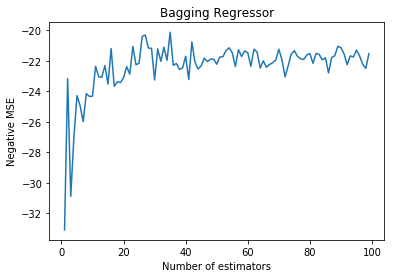

In [18]:
plt.plot(X_ax,Y_ax)
plt.title("Bagging Regressor")
plt.xlabel("Number of estimators")
plt.ylabel("Negative MSE")
plt.show()

In [19]:
#AdaBoost Regressor
X_ax = []
Y_ax = []
for i in range(1,100,1):
    ab = AdaBoostRegressor(n_estimators=i)
    scores = cross_val_score(ab, X, Y, cv=5, 
                             scoring='neg_mean_squared_error')
    X_ax.append(i)
    Y_ax.append(scores.mean())

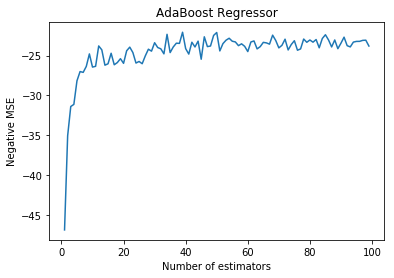

In [20]:
plt.plot(X_ax,Y_ax)
plt.title("AdaBoost Regressor")
plt.xlabel("Number of estimators")
plt.ylabel("Negative MSE")
plt.show()

In [21]:
#ExtraTrees Regressor
X_ax = []
Y_ax = []
for i in range(1,100,1):
    et = ExtraTreesRegressor(n_estimators=i)
    scores = cross_val_score(et, X, Y, cv=5, 
                             scoring='neg_mean_squared_error')
    X_ax.append(i)
    Y_ax.append(scores.mean())

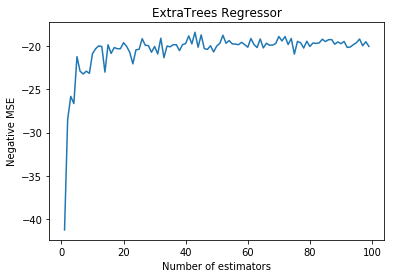

In [22]:
plt.plot(X_ax,Y_ax)
plt.title("ExtraTrees Regressor")
plt.xlabel("Number of estimators")
plt.ylabel("Negative MSE")
plt.show()

In [23]:
#Random Forest Regressor
X_ax = []
Y_ax = []
for i in np.logspace(0,3,num=50,dtype=int):
    rf = RandomForestRegressor(n_estimators=i)
    scores = cross_val_score(rf, X, Y, cv=5, 
                             scoring='neg_mean_squared_error')
    X_ax.append(i)
    Y_ax.append(scores.mean())

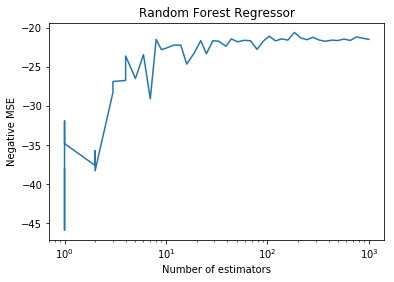

In [24]:
plt.plot(X_ax,Y_ax)
plt.title("Random Forest Regressor")
plt.xscale('log')
plt.xlabel("Number of estimators")
plt.ylabel("Negative MSE")
plt.show()